# Исследование данных о продаже игр

## Цель и задачи проекта

*Цель проекта:*
- Выявить определяющие успешность игры закономерности для определения потенциально популярного продукта и ппланирования рекламной кампании интернет-магазина «Стримчик» на 2017 г.

*Для достижения цели проекта следует выполнить следующие задачи:*
1. Провести первичный анализ входных данных;
2. Провести предобработку данных и оценить ее качество:
  - Установить единый регистр в наименовании столбцов;
  - Преобразовать типы данных;
  - Обработать пропуски и исправить ошибки в данных;
  - Рассчитать суммарные продажи во всех регионах.
3. Провести исследовательский анализ данных:
  - Проанализировать выпуск игр по годам;
  - Проанализировать влияние платформ игр на объем продаж;
  - Исследовать влияние на объем продаж отзывов пользователей и критиков;
  - Определить зависимость между жанром игр и объемом продаж.
4. Составить портрет пользователя каждого региона:
  - Определить для пользователя каждого региона самые популярные платформы и жанры;
  - Определить влияет ли рейтинг ESRB на продажи игр в отдельном регионе.
5. Проверить гипотезы:
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action и Sports разные.
6. Сформировать выводы по результатом проведенного исследования.

## Описание входных данных

**Источник данных:** 
- Из открытых источников получены исторические данные (до 2016 г.) о продажах игр, оценки пользователей и экспертов, жанры и платформы.

**Наименования столбцов, описание их содержания и единицы измерения:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию).
<br>Данные за 2016 год могут быть неполными.

## Оглавление:

1. [Открытие данных и изучение общей информации](#start)
2. [Предобработка данных](#preprocessing)  <a id="preprocessing"></a>
    * [Корректировка регистра в наименовании столбцов](#register) 
    * [Преобразование типа данных](#type) 
    * [Обработка пропущенных значений](#null)
    * [Рассчет суммарных продаж во всех регионах](#revenue)
3. [Исследовательский анализ данных](#analysis)  
    * [Анализ выпуска игр по годам](#year) 
    * [Определение влияния игровых платформ на объем продаж](#platform) 
    * [Исследование влияния на объем продаж отзывов пользователей и критиков](#critic)
    * [Определение зависимости между жанром игр и объемом продаж](#gener)
4. [Определение портрета пользователя каждого региона](#user)
6. [Проверка гипотез о пользовательских рейтингах](#hypothesis)
5. [Общий вывод](#result) 

## 1. Открытие данных и изучение общей информации <a id="start"></a>

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm
from scipy import stats as st
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
# Откроем предоставленные данные
df = pd.read_csv('/datasets/games.csv')

In [3]:
# Получим общую информацию о предоставленных данных
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Проверим наличие дубликатов
print('Количество дубликатов:', df.duplicated().sum())

# Проверим наличие дубликатов в названиях игр
print('Количество дубликатов в названиях игр:', df['Name'].duplicated().sum())

Количество дубликатов: 0
Количество дубликатов в названиях игр: 5155


In [5]:
# Проверим наличие некорректных значений User_Score и Rating
print(df['User_Score'].value_counts())
print(df['Rating'].value_counts())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
0.7       2
0.9       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64


In [6]:
# Проверим по одним ли и тем же играм отсутствует информация о рейтинге и отзывах
print(len(df.query('Critic_Score.isna() & User_Score.isna() & Rating.isna()')))

print(len(df.query('User_Score.isna() & Rating.isna()')))

6621
6630


### Вывод 1:
- Входная таблица содержит 16715 строк.
- Столбец Name содержит 2 пропуска, при этом 5155 названий игр являются дубликатами, т.к. игры указывается несколько раз в зависимости от платформы. Отработка пропусков: в дальнейшем мы будем анализировать игры за актуальный период, нетрудно заметить, что год выпуска 1993 и платформа Gen уже устарели, поэтому удалим строки с пропущенными значениями. Причина появления пропуска может быть ошибка при выгрузке.
-  В столбцах Platform и Genre значения указаны корректно, однако столбец Genre содержит 2 пропуска, которые можно было бы заполнить используя внешние источники. Но т.к. наименование этих игр у нас тоже отсутствует, удалим их. Для исследования пользы от этих двух строк не будет.
- Столбец Year of Release содержит 269 пропусков (1,6% от общего количества записей). Теоретически, также можно было бы заполнить используя внешние источники, однако это потребует значительных затрат времени, в то время как объем отсутствующих данных можно оценить как несущественный. Поэтому примем решение избавиться от пропусков, заполнив нулевыми значениями.
- Тип данных Year of Release корректнее преобразовать в целочисленный - Int64.
- В столбцах NA_sales, EU_sales, JP_sales, Other_sales пропуски отсутствуют, тип данных указан корректно.
- Столбец Critic_Score содержит 8578 пропусков (51,3% от общего количества записей), причиной может являтся отсутствие информации об оценках критиков в открытых источниках, либо оценка не проводилась. Наиболее приемлемый вариант заполнить пропуски нулевыми значениями.
- В столбце User_Score наиболее частым значением является tbd, т.е. будет определено (от англ. "to be determined"). Для нас данное значение аналогично Nan. Заменим эти значения нулевыми. Тип данных в столбце преобразуем на float64.
- Столбец User_Score содержит 6699 пропусков - 40% от общего количества записей, а с учетом tbd - 54,6%. Пропуски в данных заполним нулевыми значениями.
- Столбец Rating содержит 6766 пропусков - 40,5% от общего количества записей. Пропуски в данных обозначим буквой "N".
- В столбце Rating 3 значения RP (рейтинг ожидается), что для нас неинформативно.
- В 6630 строках одновременно пропущены данные по оценке критиков, оценке пользователей и рейтингу. Можно предположить, что данные об оценках этих игр отсутствовали в открытых источниках.

## 2. Предобработка данных <a id="preprocessing"></a>

### 2.1. Корректировка регистра в наименовании столбцов <a id="register"></a>

In [7]:
# Приведем наименования столбцов к нижнему регистру
df.columns = df.columns.str.lower()
print(df.columns) 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### 2.2. Обработка пропущенных значений <a id="null"></a>

In [8]:
# Заполним пропуски в столбцах с наименованием игр и жанром 
# В дальнейшем мы будем анализировать игры за актуальный период, нетрудно заметить, что год выпуска 1993 
# и платформа Gen уже устарела
# Поэтому удалим эти строки, т.к. они неинформативны

display(df[df['name'].isna()])
df.dropna(subset=['name'], inplace = True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
# Заполним пропуски в столбце year_of_release, объем пропусков несущественный, заполним нулевыми значениями
# Теоретически можно было бы искать год выпуска каждой игры, но объем затраченных человеко-часов не соответствует value 
df['year_of_release'] = df['year_of_release'].fillna(value=0)

# Заполним пропуски в столбце critic_score, т.к. в столбце нет значений равных нулю, заполним пропуски нулевыми значениями, 
# т.е. установим маркер
df['critic_score'] = df['critic_score'].fillna(value=0)

# Заполним пропуски в столбце user_score нулевыми значениями, установим маркер
df['user_score'] = df['user_score'].fillna(value=0)

# Заменим tbd на нулевые значения, установим маркер
df['user_score'] = df['user_score'].replace('tbd', 0)

# Заполним пропуски в столбце rating на условное значение N, установим маркер
df['rating'] = df['rating'].fillna(value='N')

# Проверим отработку пропусков
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null object
rating             16713 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None


### 2.3. Преобразование типа данных <a id="type"></a>

In [10]:
# Преобразуем тип данных 
df['year_of_release'] = df['year_of_release'].astype('Int64')

df['user_score'] = df['user_score'].astype('float64')
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,N
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,N


### 2.4. Рассчет суммарных продаж во всех регионах <a id="revenue"></a>

In [11]:
# Суммируем данные по каждому региону
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['jp_sales']
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,77.86
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,N,46.28
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,36.02
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,33.10
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,N,40.60


### Вывод:
- В результате предобработки данных нам удалось привести к единому регистру наименования столбцов.
- Были удалены неинформативные строки.
- Пропущенные значения были обозначены "0", что позволит формировать срезы без попадания в них строк с пропусками.
- Тип данных в столбце, в котором указан год выпуска игры, был изменен на целочисленный, в столбце с оценкой пользователя - на float64.
- Добавлен столбец, в котором расчитаны суммарные продажи по всем регионам.

## 3. Исследовательский анализ данных  <a id="analysis"></a>

### 3.1. Анализ выпуска игр по годам <a id="year"></a>

In [12]:
# Проанализируем количество выпускаемых игр по годам
## Сгруппируем данные по годам, рассчитав количество выпущенных игр
games_per_year = (df
                  .query('year_of_release != 0')
                  .pivot_table(index='year_of_release', values='name', aggfunc='count')
                  .reset_index(drop=False)
                  .sort_values(by='year_of_release', ascending=False)
                 )
# Скорректируем наименования столбцов
games_per_year.columns = ['year_of_release', 'number_of_games']

display(games_per_year.head(10))

,year_of_release,number_of_games
36,2016,502
35,2015,606
34,2014,581
33,2013,544
32,2012,653
31,2011,1136
30,2010,1255
29,2009,1426
28,2008,1427
27,2007,1197


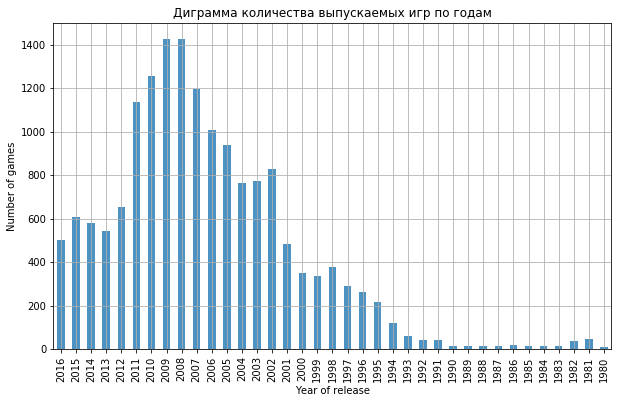

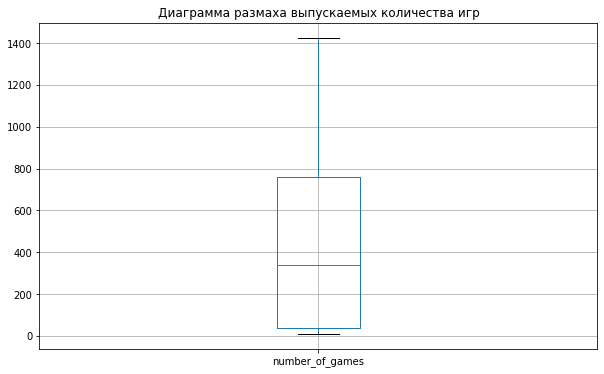

In [13]:
## На основании полученной сводной таблицы построим столбчатую диаграмму количества выпускаемых игр
games_per_year.plot(x='year_of_release', 
                    y='number_of_games', 
                    kind='bar', 
                    grid=True, 
                    figsize=(10, 6), 
                    alpha=0.8, 
                    legend=False, 
                    title='Диграмма количества выпускаемых игр по годам')
plt.xlabel('Year of release')
plt.ylabel('Number of games')
plt.show()

## На основании полученной сводной таблицы построим диаграмму размаха количества выпускаемых игр
games_per_year.boxplot(column='number_of_games', figsize=(10, 6))
plt.title('Диаграмма размаха выпускаемых количества игр')
plt.show()

In [14]:
# Проанализируем количество выпускаемых игр по годам без учета дубликатов в названиях игр (выпуск на нескольких платформах)
df_cleaned_duplicates = df.drop_duplicates(subset='name').reset_index(drop=True)

## Сгруппируем очищенные данные по годам и подсчитаем количество уникальных игр
games_per_year_cleaned = (df_cleaned_duplicates
                          .query('year_of_release != 0')
                          .pivot_table(index='year_of_release', values='name', aggfunc='count')
                          .reset_index(drop=False)
                          .sort_values(by='year_of_release', ascending=False)
                         )
## Скорректируем наименования столбцов
games_per_year_cleaned.columns = ['year_of_release', 'number_of_games']

display(games_per_year_cleaned.head(10))

,year_of_release,number_of_games
36,2016,279
35,2015,331
34,2014,279
33,2013,293
32,2012,405
31,2011,747
30,2010,859
29,2009,956
28,2008,986
27,2007,837


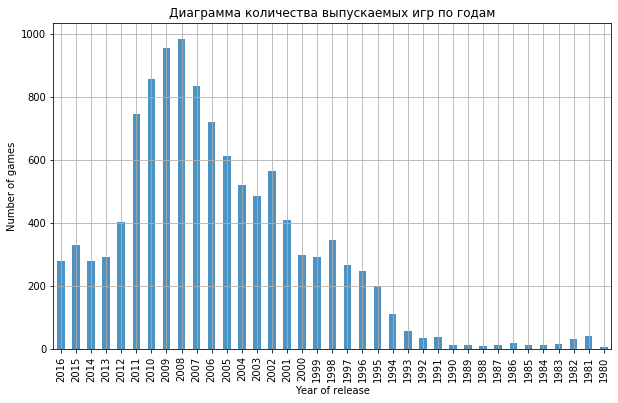

In [15]:
## Отразим полученные данные на столбчатой диаграмме 
games_per_year_cleaned.plot(x='year_of_release', 
                            y='number_of_games', 
                            kind='bar', 
                            grid=True, 
                            figsize=(10, 6), 
                            alpha=0.8, 
                            legend=False, 
                            title='Диаграмма количества выпускаемых игр по годам')
plt.xlabel('Year of release')
plt.ylabel('Number of games')
plt.show()

### Вывод:
- Проанализировав графики как по общему объему выпуска игр, так и без учета количества платформ, можно заключить, что до 1995 года объем выпуска незначителен и период с 1980 до 1995 гг. мы иможем отбросить.
- Также отметим стремительную эскалацию объема выпуска игр с 1994 г. до 2008 г. Затем с 2009 г. наблюдается снижение объема выпуска игр. Основной причиной может являться кризис 2008-го г., который вынудил многих издателей сократить расходы и, как следствие, закрыть ряд перспективных проектов. Кроме этого, люди стали меньше тратить деньги на развлечения, в т.ч. игры. Также появилась конкуренция - выпуск игр на телефонах и снижение популярности игр на представленных платформах, стоит учитывать, что в 2008 г. наблюдается резкое возрастание на рынке продажи мобильных телефонов и смартфонов.
- При этом объем продажи игр, близкий 2016 г. наблдается только с 2012 г., поэтому период до 2012 г. можно считать нерелевантным для анализа и построения стратегии торговой сети на 2017 г.

### 3.2. Определение влияния игровых платформ на объем продаж <a id="platform"></a>

In [16]:
# Определим платформы с наибольшими суммарными продажами 
## Сгруппируем данные о продажах по каждой платформе
sales_per_platform = (df
                      .query('year_of_release != 0')
                      .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                      .reset_index(drop=False)
                      .sort_values(by='total_sales', ascending=False)
                     )
## Скорректируем наименования столбцов
sales_per_platform.columns = ['platform', 'total_sales']

display(sales_per_platform.head(5))

,platform,total_sales
16,PS2,1180.63
4,DS,918.76
28,X360,888.66
26,Wii,881.75
17,PS3,876.16


### Вывод:
Исходя из полученной таблицы мы видим, что с седьмой платформы наблюдается резкий спад в объемах продаж в 2,3 раза. Поэтому платформами с наибольшими суммарными продажами являются первые 6:
- PS2
- DS
- X360
- Wii
- PS3
- PS

Отметим, что в топ не попали популярные платформы PS4 и XOne, причиной является выход плтаформ в 2013 г. (в 2014 г. в Японии), т.е. в отличие от ряда других платформ данные по продажам игр на PS4 и XOne только за 2-3 года. В то время как, например, по PS3 данные за 10 лет. Для этого на следующих этапах ограничим временную шкалу, для получения более актуальных результатов.

platform,year_of_release,DS,PS,PS2,PS3,Wii,X360
0,1985,0.04,NaN,NaN,NaN,NaN,NaN
1,1994,NaN,8.30,NaN,NaN,NaN,NaN
2,1995,NaN,43.54,NaN,NaN,NaN,NaN
3,1996,NaN,106.98,NaN,NaN,NaN,NaN
4,1997,NaN,161.40,NaN,NaN,NaN,NaN
5,1998,NaN,188.92,NaN,NaN,NaN,NaN
6,1999,NaN,164.68,NaN,NaN,NaN,NaN
7,2000,NaN,105.69,44.46,NaN,NaN,NaN
8,2001,NaN,37.28,167.44,NaN,NaN,NaN
9,2002,NaN,7.95,205.51,NaN,NaN,NaN


Text(0, 0.5, 'Total sales')

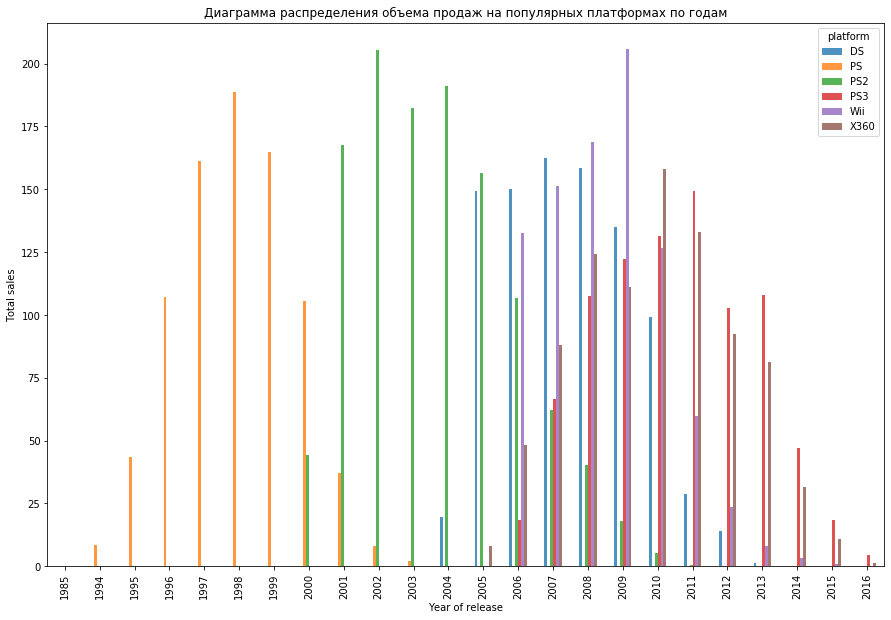

In [17]:
# По платформам с наибольшими суммарными продажами построим распределение по годам 
df_platform = (df
               .query('platform==["PS2", "DS", "X360", "Wii", "PS3", "PS"] & year_of_release != 0')
               .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
               .reset_index(drop=False)
              )

display(df_platform)

# Отразим полученные результаты на диаграмме 
df_platform.plot(x='year_of_release', 
                 kind='bar', figsize=(15, 10), 
                 alpha=0.8, 
                 title='Диаграмма распределения объема продаж на популярных платформах по годам')
plt.xlabel('Year of release')
plt.ylabel('Total sales')

### Вывод:
Исходя из анализа столбчатой диаграммы мы можем увидеть, что средний срок жизненного цикла платформы (от появления до исчезновения) составляет 10 лет. При этом пика каждая платформа достигает в среднем за 5 лет. <br>
Мы выбираем куда инвестировать и что продавать, поэтому нам нужно понять, какая платформа будет на пике или близка к своему пику в 2017 г. Мы полагаем, что актуальным будет посмотреть пятилетний период, т.е. с 2012 по 2016 гг. 
<br>Выбор данного периода также позволит невилировать эффект от значительного количества игр, которое было на рынке до 2011 г. включительно.

In [18]:
# Пранализируем данные за актуальный период
## Сгруппируем данные за актуальный период по платформам и определим наиболее популярные
top_platform = (df
                .query('year_of_release > 2011')
                .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                .reset_index(drop=False)
                .sort_values(by='total_sales', ascending=False)
               )
## Скорректируем наименования столбцов
top_platform.columns = ['platform', 'total_sales']

display(top_platform)

,platform,total_sales
4,PS4,281.75
3,PS3,280.82
0,3DS,273.53
9,X360,217.71
10,XOne,145.39
8,WiiU,89.25
6,PSV,64.42
2,PC,56.88
7,Wii,36.15
5,PSP,21.49


platform,year_of_release,3DS,PC,PS4,PSP,PSV,WiiU,XOne
0,2012,68.75,20.41,NaN,14.74,16.10,18.43,NaN
1,2013,77.54,11.27,23.06,6.03,13.19,23.69,17.23
2,2014,62.44,12.38,87.19,0.48,16.69,23.54,49.40
3,2015,42.27,7.93,106.75,0.24,10.78,18.67,54.84
4,2016,22.53,4.89,64.75,NaN,7.66,4.92,23.92


Text(0, 0.5, 'Total sales')

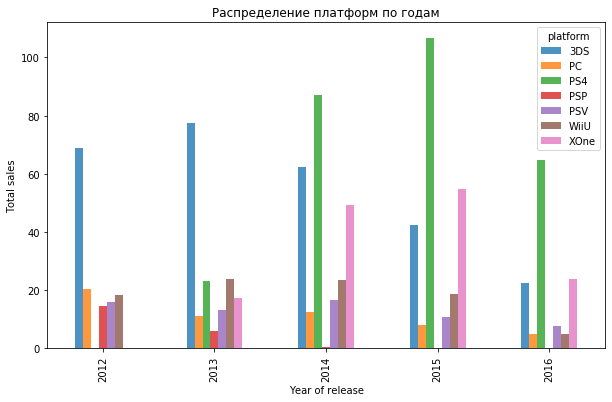

In [19]:
## Сгруппируем данные об объемах продаж по наиболее популярным платформам по годам
df_top_platform = (df
               .query('platform==["PS4", "3DS", "XOne", "WiiU", "PSV", "PC", "PSP"] & year_of_release > 2011')
               .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
               .reset_index(drop=False)
              )

display(df_top_platform)
df_top_platform.plot(x='year_of_release', 
                     kind='bar', 
                     figsize=(10, 6), 
                     alpha=0.8, 
                     title='Распределение платформ по годам')
plt.xlabel('Year of release')
plt.ylabel('Total sales')

### Вывод:
- Исходя из анализа столбчатой диграммы за период 2012-2016 гг., мы можем сделать вывод, что PS4 является лидером по объему продаж игр в 2016 г., на втором месте XOne и на третьем месте 3DS. При этом PC, WiiU, PSV, PSP не являются инвестиционно привлекательными, т.к. продажи игр на этих платформах минимальны относительно лидеров.
- Также стоит отметить, что год выпуска PS4 - 2013 (2014 - Япония), поэтому, учитывая что платформа остается на пике в течение 5 лет, можно предположить, что в 2017 г. PS4 сохранит лидирующие позиции по объему продаж. 

(0, 2.5)

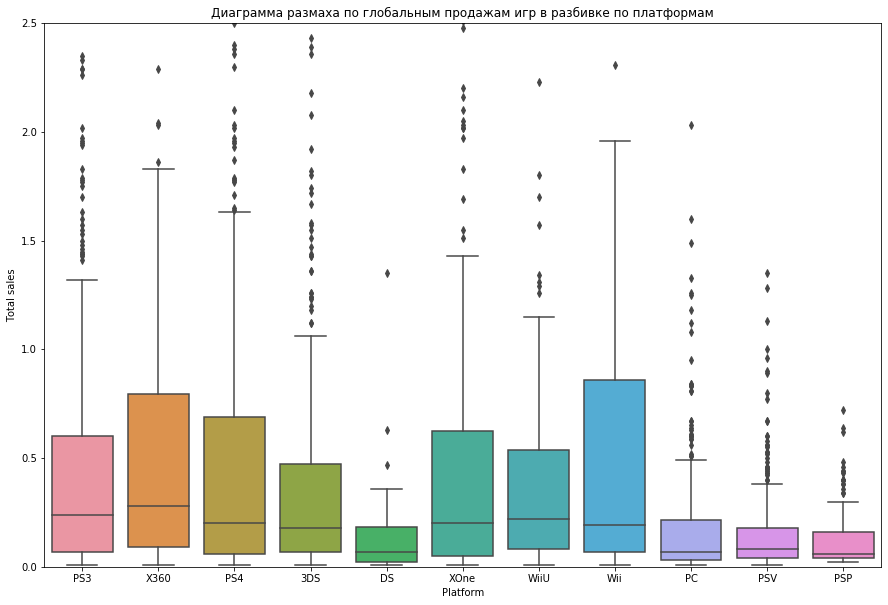

In [20]:
# Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
df_relevant = df.query('year_of_release > 2011')

plt.figure(figsize=(15,10))
sns.boxplot(data=df_relevant, x='platform', y='total_sales')
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.ylim(0, 2.5)

(0, 2.5)

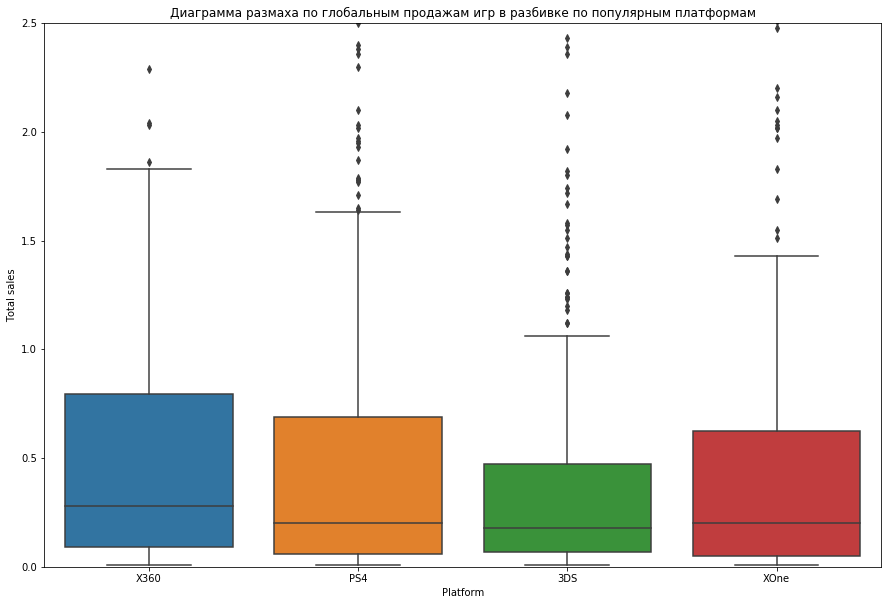

In [21]:
# Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
df_relevant_top = df.query('year_of_release > 2011 & platform==["PS4", "3DS", "XOne", "X360"]')

plt.figure(figsize=(15,10))
sns.boxplot(data=df_relevant_top, x='platform', y='total_sales')
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по популярным платформам')
plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.ylim(0, 2.5)

### Вывод:
В результате анализа диаграмм размаха по глобальным продажам игр в разбивке по платформам мы пришли к выводу, что наибольшее медианное значение объема продаж имеет платформа X360, в то время как наиболее незначительные медианные значения имеют платформы PS, PSP, DS. По всем платформам наблюдаются выбросы (аутлаеры). 

### 3.3. Исследование влияния на объем продаж отзывов пользователей и критиков <a id="critic"></a>

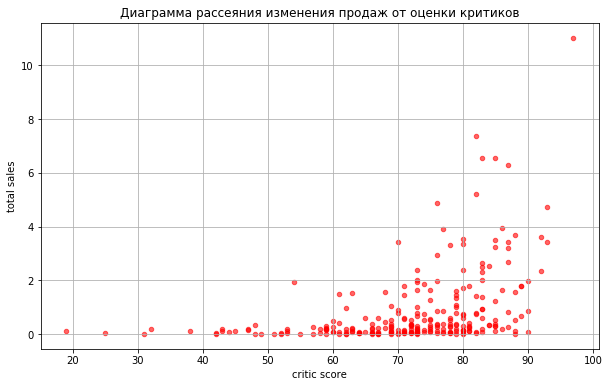

Коэффициент корреляции Пирсона 0.40939247639371634


In [22]:
# Проанализируем как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
# Построим диаграммы рассеяния и рассчитаем корреляцию между отзывами и продажами

## Построим диаграмму рассеяния изменения продаж от оценки критиков
df_relevant_ps4_critic = df_relevant.query('platform == "PS4" & critic_score != 0')

df_relevant_ps4_critic.plot(x='critic_score', 
                            y='total_sales', 
                            kind='scatter', 
                            color='red', 
                            title='Диаграмма рассеяния изменения продаж от оценки критиков', 
                            figsize=(10, 6), 
                            sharex=False, 
                            grid=True, 
                            alpha=0.6)
plt.xlabel('critic score')
plt.ylabel('total sales')
plt.show()

#определим коэффициент корреляции Пирсона
sales_critic_score_corr = df_relevant_ps4_critic['total_sales'].corr(df_relevant_ps4_critic['critic_score'])
print('Коэффициент корреляции Пирсона', sales_critic_score_corr)

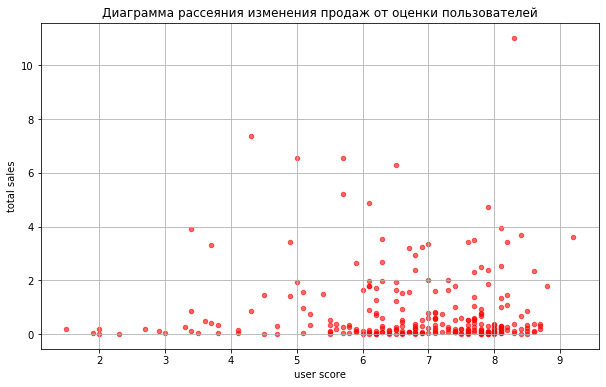

Коэффициент корреляции Пирсона 0.35489764300628185


In [23]:
## Построим диаграмму рассеяния изменения продаж от оценки пользователей
df_relevant_ps4_user = df_relevant.query('platform == "PS4" & user_score != 0')

df_relevant_ps4_user.plot(x='user_score', 
                          y='total_sales', 
                          kind='scatter', 
                          color='red', 
                          title='Диаграмма рассеяния изменения продаж от оценки пользователей', 
                          figsize=(10, 6), 
                          sharex=False, 
                          grid=True, 
                          alpha=0.6)
plt.xlabel('user score')
plt.ylabel('total sales')
plt.show()

#определим коэффициент корреляции
sales_user_score_corr = df_relevant_ps4_user['total_sales'].corr(df_relevant_ps4_user['critic_score'])
print('Коэффициент корреляции Пирсона', sales_user_score_corr)

### Вывод:
В результате исследования влияния на объем продаж игр на платформе PS4 отзывов пользователей и критиков была выявлена умеренная связь между объемом продаж игр и оценками критиков (corr = 0,4), а также умеренная связь между объемом продаж игр и оценками пользователей (corr = 0,35). Исходя из полученных результатов оценка критиков оказывает немного большее значение на объем продаж игр. Однако стоит учитывать, что связь весьма слабая, очевидно, что высокие оценки критиков и пользователей положительной влияют на объем продаж, но это не является первостепенным фактором.

X360
Коэффициент корреляции оценки критиков и объема продаж: 0.36
Коэффициент корреляции оценки пользователей и объема продаж: 0.01
3DS
Коэффициент корреляции оценки критиков и объема продаж: 0.32
Коэффициент корреляции оценки пользователей и объема продаж: 0.21
XOne
Коэффициент корреляции оценки критиков и объема продаж: 0.42
Коэффициент корреляции оценки пользователей и объема продаж: -0.07


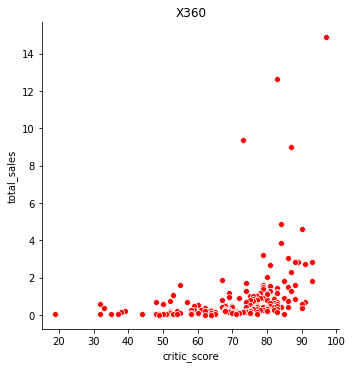

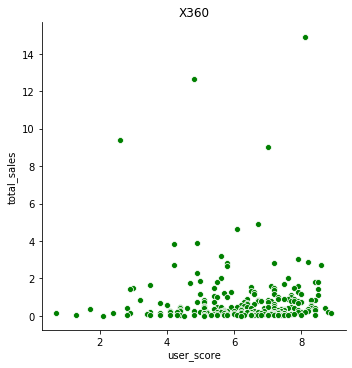

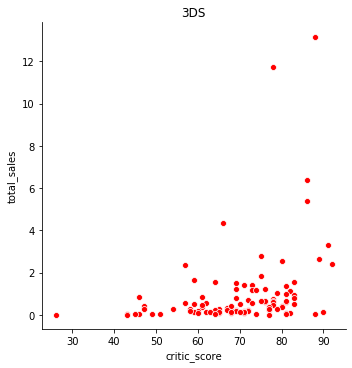

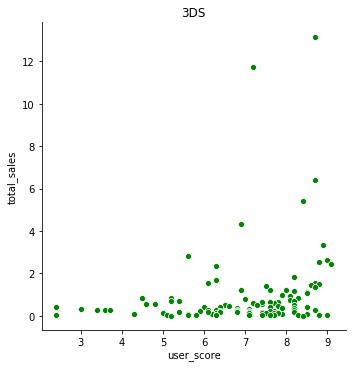

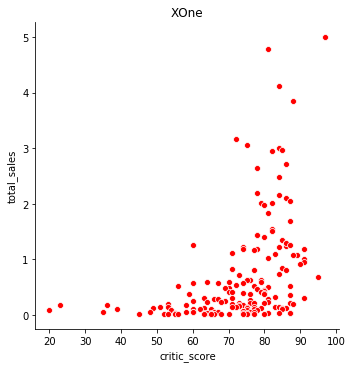

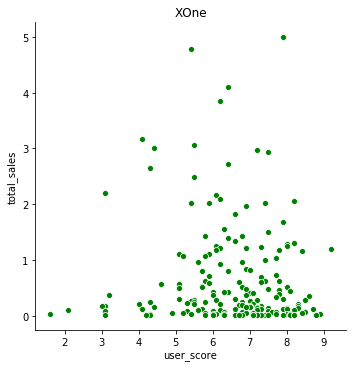

In [24]:
# Соотнесем выводы с продажами игр на других топ-платформах
for platform in ['X360', '3DS', 'XOne']:
    print(platform)
    df_relevant_crit = df_relevant.query('platform == @platform and (critic_score != 0)')
    print('Коэффициент корреляции оценки критиков и объема продаж: {}'.format(round(df_relevant_crit['critic_score'].corr(df_relevant_crit['total_sales']), 2)))
    sns.relplot(x='critic_score', y="total_sales", data=df_relevant_crit, kind='scatter', color='red')
    plt.title(platform)

    df_relevant_us = df_relevant.query('platform == @platform and (user_score != 0)')
    print('Коэффициент корреляции оценки пользователей и объема продаж: {}'.format(round(df_relevant_us['user_score'].corr(df_relevant_us['total_sales']), 2)))
    sns.relplot(x='user_score', y="total_sales", data=df_relevant_us, kind='scatter', color='green')
    plt.title(platform)

### Вывод:
- В результате анализа взаимосвязи оценок пользователей и критиков с объемом продаж на других популярных платформах, мы пришли к выводу, что умеренная взаимосвязь между оценками критиков и популярностью игр сохраняется и на других платформах, коэффициент корреляции Пирсона изменяется в интервале от 0,32 до 0,42. 
- Однако коэффициенты корреляции между оценками пользователей и объемом продаж значительно отличаются, преобладает положительная корреляция, но при рассчете коэф. кор. по платформе XOne мы получили незначительную отрицательную корреляцию близкую к нулю. 
- Исходя из этого, можем заключить, что оценка пользователей почти не оказывает влияние на потребление игр, в то время как оценка критиков демонстрирует устойчивую положительную взаимосвязь. 

### 3.4. Определение зависимости между жанром игр и объемом продаж <a id="gener"></a>

In [25]:
# Определим наиболее часто встречающиеся жанры 
df_genre_counting = df_relevant['genre'].value_counts()
print(df_genre_counting)
# Сформируем словарь из полученных значений
dict_genre_counting = dict(df_genre_counting)

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64


### Вывод:
Наиболее популярным среди производителей игр является жанр action. Количество игр в этом жанре в 2,8 раз превышает следующий по рпспространненности жанр - Role-Playing. Также в топ - 5 входят жанры Adventure, Sports и Shooter. На последнем месте жанр Puzzle.

In [26]:
# Определим наиболее прибыльный жанр, сгруппируем данные о продажах игр по жанрам
df_relevant_pivot_genre = (df_relevant
                           .pivot_table(index='genre', values='total_sales', aggfunc='sum')
                           .sort_values(by='total_sales', ascending=False)
                           .reset_index(drop=False)
                          )

# Очевидно влияние количество выпускаемых игр каждого жанра
# Добавим столбец с количеством игр
df_relevant_pivot_genre['number_of_games'] = df_relevant_pivot_genre['genre'].map(dict_genre_counting)

# Определим средний объем продаж на одну игру (млн.)
df_relevant_pivot_genre['number_of_game_sales'] = df_relevant_pivot_genre['total_sales'] / df_relevant_pivot_genre['number_of_games']
display(df_relevant_pivot_genre.sort_values(by='number_of_game_sales', ascending=False))

,genre,total_sales,number_of_games,number_of_game_sales
1,Shooter,276.70,235,1.177447
5,Platform,64.05,85,0.753529
2,Role-Playing,243.41,370,0.657865
3,Sports,166.64,268,0.621791
8,Simulation,43.34,80,0.541750
4,Misc,90.23,192,0.469948
7,Fighting,49.46,109,0.453761
6,Racing,49.51,115,0.430522
0,Action,442.78,1031,0.429467
11,Puzzle,6.81,28,0.243214


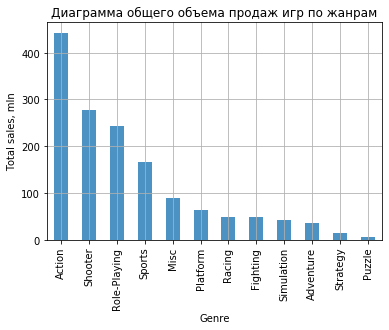

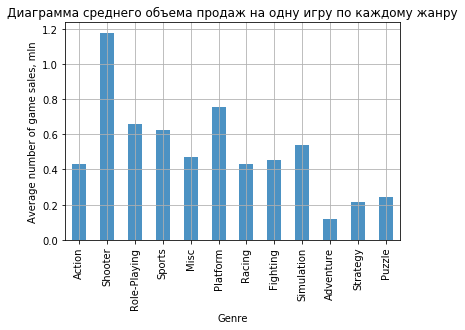

In [27]:
# Диаграмма общего объема продаж по каждому жанру
df_relevant_pivot_genre.plot(x='genre', 
                             y='total_sales', 
                             kind='bar', 
                             grid=True, 
                             figsize=(6, 4), 
                             alpha=0.8, 
                             legend=False, 
                             title='Диаграмма общего объема продаж игр по жанрам')
plt.xlabel('Genre')
plt.ylabel('Total sales, mln')
plt.show()
# Диаграмма среднего объема продаж на одну игру по каждому жанру 
df_relevant_pivot_genre.plot(x='genre', 
                             y='number_of_game_sales', 
                             kind='bar', 
                             grid=True, 
                             figsize=(6, 4), 
                             alpha=0.8, 
                             legend=False, 
                             title='Диаграмма среднего объема продаж на одну игру по каждому жанру')
plt.xlabel('Genre')
plt.ylabel('Average number of game sales, mln')
plt.show()

### Вывод:
- Несмотря на то, что наиболее популярным среди производителей является жанр Action, наиболее рентабельным является жанр Shooter, который на втором месте по совокумному объему выпуска игр. 
- Тем не менее, за счет огромного количества игр в жанре Action, почти в 3 раза превышающего количество игр в жанре Shooter, жанр Action является лидером по объему продаж.

## 4. Определение портрета пользователя каждого региона  <a id="user"></a>

### Определение самых популярных платформ по регионам

Таблица самые популярные платформы по региону: na_sales


,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31



Диаграмма самые популярные платформы по региону: na_sales


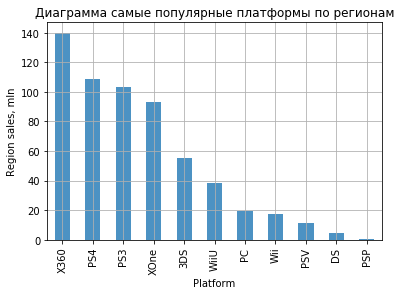

Таблица самые популярные платформы по региону: eu_sales


,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64



Диаграмма самые популярные платформы по региону: eu_sales


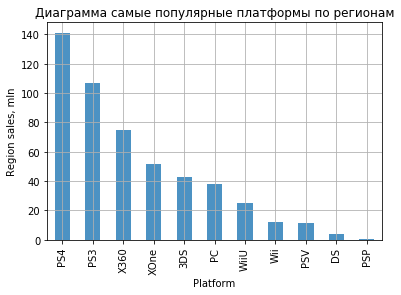

Таблица самые популярные платформы по региону: jp_sales


,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01



Диаграмма самые популярные платформы по региону: jp_sales


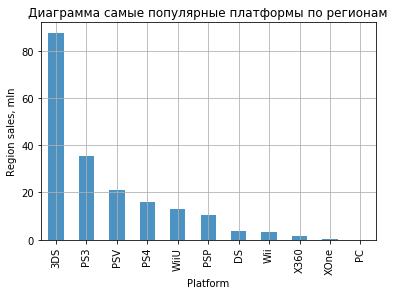

In [28]:
# Определим самые популярные платформы (топ-5) по регионам 
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    df_relevant_region = (df_relevant
                          .pivot_table(index='platform', values=region, aggfunc='sum')
                          .sort_values(by=region, ascending=False)
                          .reset_index(drop=False)
                         )
    print('Таблица самые популярные платформы по региону:', region)
    display(df_relevant_region.head())
    print()
    print('Диаграмма самые популярные платформы по региону:', region)
    df_relevant_region.plot(x='platform', 
                            y=region, 
                            kind='bar', 
                            grid=True, 
                            figsize=(6, 4), 
                            alpha=0.8, 
                            legend=False, 
                            title='Диаграмма самые популярные платформы по регионам')
    plt.xlabel('Platform')
    plt.ylabel('Region sales, mln')
    plt.show()

,na_sales,share
platform,,
X360,140.05,0.24
PS4,108.74,0.18
PS3,103.38,0.17
XOne,93.12,0.16
3DS,55.31,0.09



Доли продаж по платформам по региону: na_sales


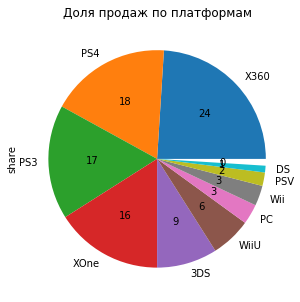

,eu_sales,share
platform,,
PS4,141.09,0.28
PS3,106.86,0.21
X360,74.52,0.15
XOne,51.59,0.10
3DS,42.64,0.08



Доли продаж по платформам по региону: eu_sales


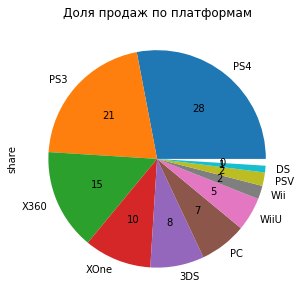

,jp_sales,share
platform,,
3DS,87.79,0.46
PS3,35.29,0.18
PSV,21.04,0.11
PS4,15.96,0.08
WiiU,13.01,0.07



Доли продаж по платформам по региону: jp_sales


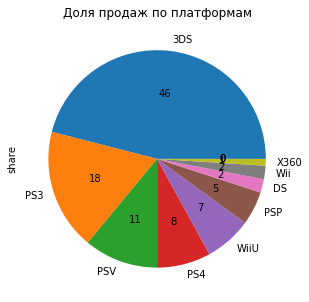

In [29]:
# Определим различия в долях продаж по платформам
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    df_relevant_region = (df_relevant
                          .pivot_table(index='platform', values=region, aggfunc='sum')
                          .sort_values(by=region, ascending=False)
                         )
    df_relevant_region['share'] = round(df_relevant_region[region] / df_relevant_region[region].sum(), 2)
    display(df_relevant_region.head())
    print()
    print('Доли продаж по платформам по региону:', region)
    df_relevant_region.plot.pie(y='share', 
                                figsize=(5, 5),
                                autopct="%.0f",
                                legend=False, 
                                title='Доля продаж по платформам')
    plt.show()

### Вывод:
- В результате исследования наиболее популярных платформ по регионам было выявлено, что в Северной Америке наиболее популярными платформами являются: X360, PS4, PS3, XOne и 3DS.
- В Европе структура популярных платформ весьма сходна с Северной Америкой, однако отличием является расположение топ-3 платформ. В Европе на первом месте PS4, на втором - PS3, а на третьем месте X360, которая в Северной Америке занимает лидирующую позицию.
- В Японии ситуация весьма координально отличает от Европы и Северной Америки. Лидирующую позицию по популярности занимает платформа 3DS, которая в Европе и Северной Америке занимает нижнюю строчку топ-5 платформ. PS3, аналогично Европе занимает второе место по популярности. Стоит отметить, что PS4 расположена ниже, чем PS3, возможно, оказало влияние более позднее введение платформы на территории Японии. Также заметим, что в топе популярных платформ Японии появились такие платформы как PSV и WiiU, которые отсутствовали в топ-4 Европы и Северной Америки.
- Анализ различий в долях продаж по платформам позволяет заключить, что в  наибольшую долю продаж - 28% формирует платформа PS4, в Северной Америке наибольшую долю - 24% формирует платформа X360. При этом в Японии наблюдается явное доминирование, платформа 3DS формирует 46% от общего объема продаж.
- Наибольшая часть продаж в обоих регионах сфокусирована на 3 платформах PS4, X360 и PS3, которые покрывают 60% продаж в Северной Америке и 65% в Европе.

### Определение самых популярных жанров по регионам

Таблица самые популярные жанры по региону: na_sales


,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19



Диаграмма самые популярные жанры по региону: na_sales


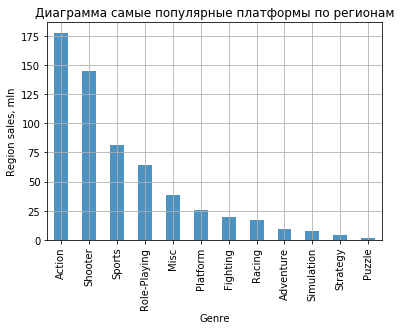

Таблица самые популярные жанры по региону: eu_sales


,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29



Диаграмма самые популярные жанры по региону: eu_sales


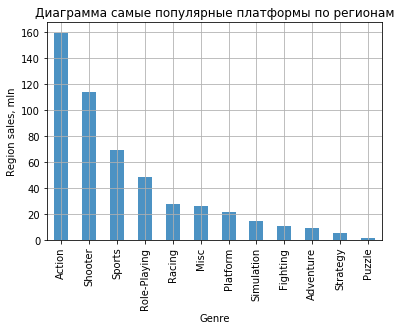

Таблица самые популярные жанры по региону: jp_sales


,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44



Диаграмма самые популярные жанры по региону: jp_sales


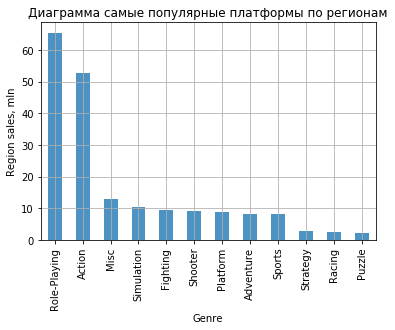

In [30]:
# Определим самые популярные жанры (топ-5)
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    df_relevant_region_genre = (df_relevant
                                .pivot_table(index='genre', values=region, aggfunc='sum')
                                .sort_values(by=region, ascending=False)
                                .reset_index(drop=False)
                               )
    print('Таблица самые популярные жанры по региону:', region)
    display(df_relevant_region_genre.head())
    print()
    print('Диаграмма самые популярные жанры по региону:', region)
    df_relevant_region_genre.plot(x='genre', 
                                  y=region, 
                                  kind='bar', 
                                  grid=True, 
                                  figsize=(6, 4), 
                                  alpha=0.8, 
                                  legend=False, 
                                  title='Диаграмма самые популярные платформы по регионам')
    plt.xlabel('Genre')
    plt.ylabel('Region sales, mln')
    plt.show()

### Вывод:
В результате анализа наиболее популярных жанров были сделы следующие выводы:
- Топ-5 жанров в Северной Америке и Европе совпадают кроме 5 позиции. Лидерами в этих регионах являются жанры Action, Shooter, Sports, Role-Playing. На пятом месте в Северной Америке расположен жанр Misc, а в Европе Racing.
- Топ-5 жанров в Японии существенно отличается от остальных регионов. Лидирующую позицию среди жанров занимает Role-Playing, затем следуют Action, Misc, Simulation и Fighting. Опять же мы сталкиваемся со спецификой вкуса потребителей из Японии.
- Самым непопулярным жанром во всех странах является жанр Puzzle.

Таблица распределение продаж по рейтингу ESRB по региону: na_sales


,rating,na_sales
0,M,231.57
1,E,114.37
2,E10+,75.70
3,T,66.02



Диаграмма распределение продаж по рейтингу ESRB по региону na_sales


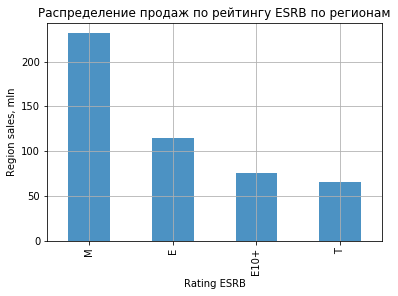

Таблица распределение продаж по рейтингу ESRB по региону: eu_sales


,rating,eu_sales
0,M,193.96
1,E,113.03
2,E10+,55.37
3,T,52.96



Диаграмма распределение продаж по рейтингу ESRB по региону eu_sales


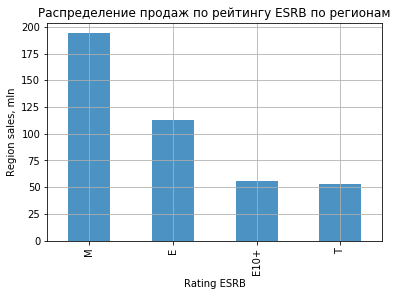

Таблица распределение продаж по рейтингу ESRB по региону: jp_sales


,rating,jp_sales
0,E,28.33
1,T,26.02
2,M,21.20
3,E10+,8.19



Диаграмма распределение продаж по рейтингу ESRB по региону jp_sales


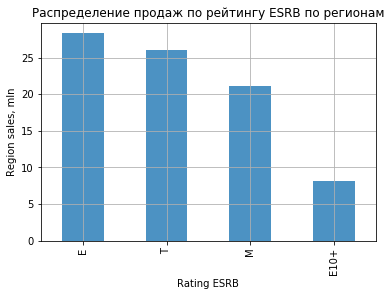

In [31]:
# Определим влияет ли рейтинг ESRB на продажи в отдельном регионе
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    df_relevant_rating = (df_relevant
                                .query('rating != "N"')
                                .pivot_table(index='rating', values=region, aggfunc='sum')
                                .sort_values(by=region, ascending=False)
                                .reset_index(drop=False)
                               )
    print('Таблица распределение продаж по рейтингу ESRB по региону:', region)
    display(df_relevant_rating)
    print()
    print('Диаграмма распределение продаж по рейтингу ESRB по региону', region)
    df_relevant_rating.plot(x='rating', y=region, kind='bar', grid=True, figsize=(6, 4), alpha=0.8, legend=False, title='Распределение продаж по рейтингу ESRB по регионам')
    plt.xlabel('Rating ESRB')
    plt.ylabel('Region sales, mln')
    plt.show()

### Вывод:
Исследование влияния рейтинга ESRB на продажи в отдельном регионе позволило сделать следующие выводы:
- Распределение продаж по рейтингу ESRB в Северной Америке и Европе идентично. Наиболее популярны игры M (17+), на втором месте E (everyone), на третьем - E+10, на четвертом - T (teen).
- В Японии на превом месте расположилось E, на втором - T, на третьем - M, на четвертом - E10+.
- Исходя из полученных результатов можно предположить, что в Японии более активными потребителями игр являются дети и подростки, в то время как в Северной Америке и Европе основными потребителями является более старшая аудитория - люди старше 17 лет. 

## 5. Проверка гипотез о пользовательских рейтингах <a id="hypothesis"></a>

### Проверка гипотезы: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
Начнем с формирования нулевой гипотезы Н0. Нулевую гипотезу сформируем таким образом, чтобы использовать знак равенства.
- **Нo**: cредний пользовательский рейтинг платформы Xbox One равен cреднему пользовательскому рейтингу платформы PC.
Мы можем предположить отклонение наблюдаемого значения в обе стороны, поэтому сформируем двухстороннюю альтернативную гипотезу.
- **H1**: cредний пользовательский рейтинг платформы Xbox One не равен cреднему пользовательскому рейтингу платформы PC.
Если мы отвергнем Ho, то можно сделать предположение, что cредние пользовательские рейтинги платформ Xbox One и PC различаются.

**Выбор статистического критерия:** В данном случае нам необходимо провести анализ различий между группами. Тип данных - количественные. Количество групп для анализа - 2. Выборки являются независимыми. Исходя из полученных гистограмм и графиков плотности распределения значений рейтинга, можно предположить, что в данном случае значения имеют нормальное распределение. В связи с этим применим t-критерий Стьюдента для независисмых выборок. 

Для сравнения средних значений двух генеральных совокупностей воспользуемся t-критерием Стьюдента, т.е. для того чтобы определить различаются ли cредние пользовательские рейтинги платформ Xbox One и PC , применим метод scipy.stats.ttest_ind. Для применения данного критерия необходимо, чтобы исходные данные имели нормальное распределение. 

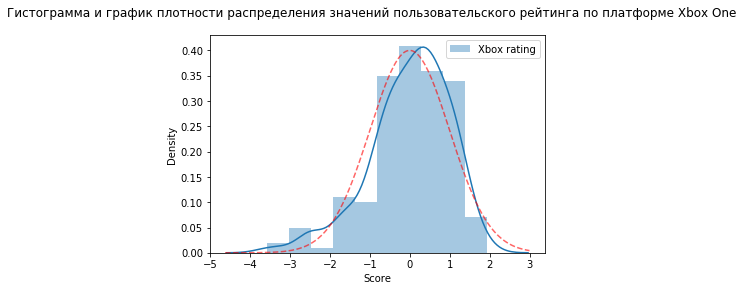

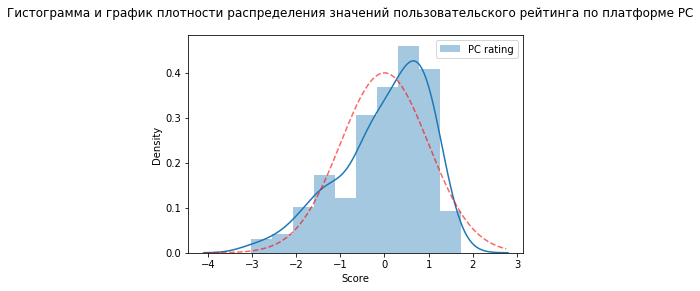

In [32]:
# Построим гистограммы распределений значений пользовательского рейтинга по платформам Xbox One и PC
df_xbox_one = df_relevant.query('platform == "XOne" & user_score != 0')
df_pc = df_relevant.query('platform == "PC" & user_score != 0')

# Масштабируем данные для приведения их к общей шкале без потери информации о различии диапазонов
normalized_xbox_one =(df_xbox_one['user_score'] - df_xbox_one['user_score'].mean()) / df_xbox_one['user_score'].std()
normalized_pc =(df_pc['user_score'] - df_pc['user_score'].mean()) / df_pc['user_score'].std()

# Построим график и гистограмму плотности распределения пользовательского рейтинга по платформе Xbox One
sns.distplot(normalized_xbox_one, bins=10, fit=norm, fit_kws = {'color':'red', 'linestyle':'--', 'alpha': 0.6}, label = "Xbox rating")
plt.suptitle('Гистограмма и график плотности распределения значений пользовательского рейтинга по платформе Xbox One')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.show()

# Построим график и гистограмму плотности распределения значений пользовательского рейтинга по платформе PC
sns.distplot(normalized_pc, bins=10, fit=norm, fit_kws = {'color':'red', 'linestyle':'--', 'alpha': 0.6}, label = "PC rating") 
plt.suptitle('Гистограмма и график плотности распределения значений пользовательского рейтинга по платформе PC')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In [33]:
# Проверим гипотезу Нo: cредние пользовательские рейтинги платформ Xbox One и PC равны

xbox_one = df_xbox_one['user_score']
pc = df_pc['user_score']

alpha = 0.05 

results = st.ttest_ind(
    xbox_one, 
    pc,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


### Вывод по гипотезе 1:
В результате проверки гипотезы Ho: cредние пользовательские рейтинги платформ Xbox One и PC равны - не была отвергнута. Полученное значение p-value говорит о том, что хотя средний рейтинг на платформах неодинаков, с вероятностью в около 55% такое различие можно получить случайно. Исходя из этого, утверждать о различиях в среднем пользовательском рейтинге некорректно. Можно предположить, что пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Проверка гипотезы: cредние пользовательские рейтинги жанров Action и Sports разные
Начнем с формирования нулевой гипотезы Н0. Нулевую гипотезу сформируем таким образом, чтобы использовать знак равенства.
- **Нo**: cредний пользовательский рейтинг жанра Action равен cреднему пользовательскому рейтингу жанра Sports.
Мы можем предположить отклонение наблюдаемого значения в обе стороны, поэтому сформируем двухстороннюю альтернативную гипотезу.
- **H1**: cредний пользовательский рейтинг жанра Action не равен cреднему пользовательскому рейтингу жанра Sports.
Если мы отвергнем Ho, то можно сделать предположение, что cредние пользовательские рейтинги по жанрам Action и Sports различаются.

**Выбор статистического критерия:** В данном случае нам необходимо провести анализ различий между группами. Тип данных - количественные. Количество групп для анализа - 2. Выборки являются независимыми. Исходя из полученных гистограмм и графиков плотности распределения значений рейтинга, можно предположить, что в данном случае значения имеют нормальное распределение. В связи с этим применим t-критерия Стьюдента для независисмых выборок. 

Для сравнения средних значений двух генеральных совокупностей воспользуемся t-критерием Стьюдента, т.е. для того чтобы определить различаются ли cредние пользовательские рейтинги по жанрам Action и Sports, применим метод scipy.stats.ttest_ind. Для применения данного критерия необходимо, чтобы исходные данные имели нормальное распределение. 

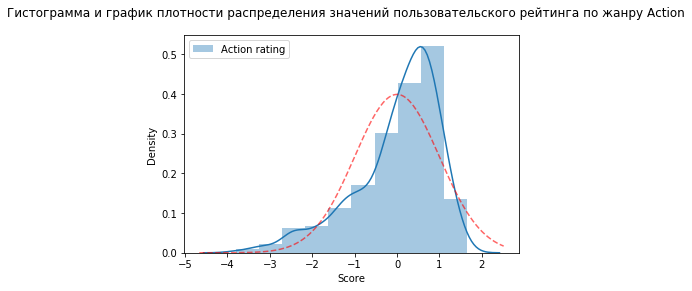

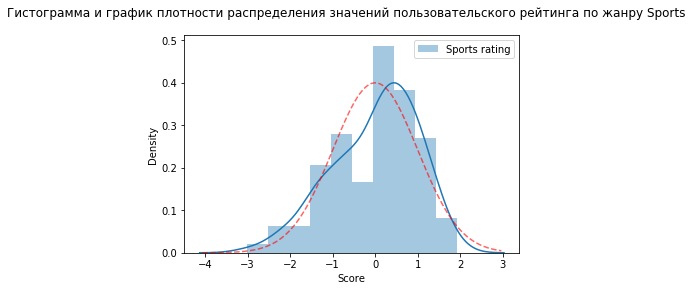

In [34]:
# Построим гистограммы распределений значений пользовательского рейтинга по жанрам Action и Sports
df_action = df_relevant.query('genre == "Action" & user_score != 0')
df_sports = df_relevant.query('genre == "Sports" & user_score != 0')

# Масштабируем данные для приведения их к общей шкале без потери информации о различии диапазонов
normalized_action =(df_action['user_score'] - df_action['user_score'].mean()) / df_action['user_score'].std()
normalized_sports =(df_sports['user_score'] - df_sports['user_score'].mean()) / df_sports['user_score'].std()

# Построим график и гистограмму плотности распределения пользовательского рейтинга по жанру Action
sns.distplot(normalized_action, bins=10, fit=norm, fit_kws = {'color':'red', 'linestyle':'--', 'alpha': 0.6}, label = "Action rating")
plt.suptitle('Гистограмма и график плотности распределения значений пользовательского рейтинга по жанру Action')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.show()

# Построим график и гистограмму плотности распределения значений пользовательского рейтинга по жанру Sports
sns.distplot(normalized_sports, bins=10, fit=norm, fit_kws = {'color':'red', 'linestyle':'--', 'alpha': 0.6}, label = "Sports rating") 
plt.suptitle('Гистограмма и график плотности распределения значений пользовательского рейтинга по жанру Sports')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In [35]:
# Проверим гипотезу Нo: cредний пользовательский рейтинг жанра Action равен cреднему пользовательскому рейтингу жанра Sports

action = df_action['user_score']
sports = df_sports['user_score']

alpha = 0.05 

results = st.ttest_ind(
    action, 
    sports,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


### Вывод по гипотезе 2:
В результате проверки статичтического критерия мы отвергли гипотезу Hо о равенстве cреднего пользовательского рейтинга жанров Action и Sports. Полученное значение p-value говорит о том, что средний пользовательский рейтинг неодинаков, а вероятность получить такое различие случайно крайне мала. Можно сделать предположение, что средний пользовательский рейтинг жанров Action и Sports различается.

## 6. Общий вывод <a id="result"></a>

В результате проекта "Исследование данных о продаже игр" нами был проведен анализ входных данных, определены направления предобработки данных. Затем на этапе предобработки данных были заполнены пропущенные значения, были применены методы удаления строк и т.д. Также в рамках предобработки были скорректированы типы данных, где были изначально указаны ошибочно или тип был неоптимален. По итогам предобработки данных была проведена проверка качества ее выполнения. Затем были проведены расчеты дополнительных параметров, таких как суммарные продажи игр по всем регионам.
<br> В процессе проведения исследовательского анализа данных был определен актуальный для анализа период (2012-2016 гг.). По актуальным данным было исследовано влияния игровых платформ на объем продаж. Исходя из анализа за период 2012-2016 гг., было выявлено, что PS4 является лидером по объему продаж игр в 2016 г., на втором месте XOne и на третьем месте 3DS. Предполагается, что в 2017 г. PS4 сохранит лидирующие позиции по объему продаж и является наиболее перспективной для инвестирования.
<br>В результате анализа взаимосвязи оценок пользователей и критиков с объемом продаж на популярных платформах, мы пришли к выводу, что существует умеренная взаимосвязь между оценками критиков и популярностью игр, коэффициент корреляции Пирсона изменяется в интервале от 0,32 до 0,42. Однако оценка пользователей почти не оказывает влияние на потребление игр.
<br> В результате исследования зависимости между жанром игр и объемом продаж было определено, что жанр Action является лидером по объему продаж, при этом аиболее рентабельным является жанр Shooter, который на втором месте по совокумному объему выпуска игр после Action.
<br> Формирование портрета пользователя позволило выявить сходство между пользователями из Европы и Северной Америки и их значительные отличия от пользователей из Японии. В Европе структура популярных платформ весьма сходна с Северной Америкой. Наибольшая часть продаж в обоих регионах сфокусирована на 3 платформах PS4, X360 и PS3, которые покрывают 60% продаж в Северной Америке и 65% в Европе. В Японии ситуация координально отличает от Европы и Северной Америки. В частности лидирующую позицию по популярности занимает платформа 3DS, которая в Европе и Северной Америке занимает нижнюю строчку топ-5 платформ.
<br> Анализ популярных жанров по регионам также позволил выявить сходство между пользователями из Европы и Северной Америки. Лидерами в этих регионах являются жанры Action, Shooter, Sports. При этом в Японии лидерами являются такие жанры как Role-Playing, Action, Misc.
<br> Исследование влияния рейтинга ESRB на продажи в отдельном регионе позволило сделать вывод, что в Японии более активными потребителями игр являются дети и подростки, в то время как в Северной Америке и Европе основными потребителями является более старшая аудитория - люди старше 17 лет.
<br>На этапе проверки гипотез были проверены две гипотезы.
<br>В результате проверки гипотезы Ho: cредние пользовательские рейтинги платформ Xbox One и PC равны - гипотеза не была отвергнута. Можно предположить, что пользовательские рейтинги платформ Xbox One и PC одинаковые.
<br>В результате проверки мы отвергли гипотезу Hо о равенстве cреднего пользовательского рейтинга жанров Action и Sports. Можно сделать предположение, что средний пользовательский рейтинг жанров Action и Sports различается.